As It is confirmed that the data is clean, the next step is to train the model. and we already tried with Label Encoder which is not working well. so we will try with Frequency Encoder. as gave better result.

# ML Model Building

## Data Loading and Cleaning


In [1200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import preprocessing_d
importlib.reload(preprocessing_d)
import preprocessing_d



In [1201]:
bikes=pd.read_csv("bikes.csv")
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [1202]:
bikes[bikes["price"]==0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price
4786,Bajaj Pulsar 180cc 2009,2009,60000 Km,second owner,delhi,\n\n 45 kmpl,17 bhp,0
6200,Hero Passion Xpro 110cc 2015,2015,9000 Km,first owner,jaipur,\n\n 55 kmpl,6.72 KW (9.1 Ps),0
6780,Hyosung GT250R 2013,2013,5000 Km,first owner,delhi,\n\n 30 kmpl,28 bhp,0
6795,Royal Enfield Classic 500cc 2014,2014,10200 Km,first owner,bangalore,\n\n 32 kmpl,27.20 bhp,0
7393,Bajaj Pulsar 200 NS 200cc 2008,2008,28000 Km,first owner,vadodara,\n\n,23 bhp,0
7408,Hero Passion Pro 100cc 2009,2009,33474 Km,first owner,chennai,\n\n 5 kmpl,8.2 Bhp,0
7428,TVS Star City 110cc 2012,2012,53520 Km,first owner,chennai,\n\n 85 kmpl,8.2 bhp,0
7429,Hero Passion Pro 100cc 2014,2014,16138 Km,first owner,chennai,\n\n 5 kmpl,8.2 Bhp,0
7476,TVS Apache RTR 180cc 2012,2012,Mileage 45 Kmpl,first owner,bhuj,\n\n 45 Kmpl,17.2 bhp,0
7482,TVS Star City Plus 110cc 2015,2015,4500 Km,first owner,jaipur,\n\n 85 kmpl,8.2 bhp,0


In [1203]:
bikes[bikes["price"]==0].count()

model_name    31
model_year    31
kms_driven    31
owner         31
location      31
mileage       31
power         31
price         31
dtype: int64

In [1204]:
# dropped rows where price is 0
bikes.drop(bikes[bikes["price"]==0].index,inplace=True)

In [1205]:
bikes1=preprocessing_d.BikePreprocess(bikes)
bikes1.preprocess_dataset()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha Yzf-R15 150Cc 2011,2011,7000.0,1,Agra,42.0,16.0,55000,Yamaha,150.0
7853,Bajaj Discover 100Cc 2015,2015,80.0,1,Delhi,80.0,7.7,28000,Bajaj,100.0
7854,Bajaj Pulsar 180Cc 2016,2016,6407.0,1,Bangalore,65.0,17.0,61740,Bajaj,180.0
7855,Bajaj V15 150Cc 2016,2016,7524.0,1,Bangalore,57.0,11.0,49000,Bajaj,150.0


In [1206]:
bikes=preprocessing_d.BikePreprocess(bikes).preprocess_dataset()

In [1207]:
bikes.shape

(7826, 10)

In [1208]:
df = bikes[(bikes['price'] < 500000) & (bikes['kms_driven'] < 200000)]
df.shape

(7636, 10)

In [1209]:
lower_cap = bikes['price'].quantile(0.01)
upper_cap = bikes['price'].quantile(0.99)
df['price'] = bikes['price'].clip(lower=lower_cap, upper=upper_cap)
df["price"]


0        63500.0
1       115000.0
2       300000.0
3       100000.0
4       197500.0
          ...   
7852     55000.0
7853     28000.0
7854     61740.0
7855     49000.0
7856     65000.0
Name: price, Length: 7636, dtype: float64

In [1210]:
bikes.loc[df["price"].index]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha Yzf-R15 150Cc 2011,2011,7000.0,1,Agra,42.0,16.0,55000,Yamaha,150.0
7853,Bajaj Discover 100Cc 2015,2015,80.0,1,Delhi,80.0,7.7,28000,Bajaj,100.0
7854,Bajaj Pulsar 180Cc 2016,2016,6407.0,1,Bangalore,65.0,17.0,61740,Bajaj,180.0
7855,Bajaj V15 150Cc 2016,2016,7524.0,1,Bangalore,57.0,11.0,49000,Bajaj,150.0


In [1211]:
bikes=bikes.loc[df["price"].index]

In [1212]:
# Filter bikes where its index is NOT in df.index
filtered_bikes = bikes[~bikes.index.isin(df.index)]
filtered_bikes.head()


,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc


In [1213]:
from preprocessing_d import ML_scale_tranfsormed
filtered_bikes_trans=ML_scale_tranfsormed(filtered_bikes).transform_data_freq()

In [1214]:
filtered_bikes_trans["model_name"].value_counts()

Series([], Name: count, dtype: int64)

In [1215]:
filtered_bikes_trans

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc


In [1216]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0


In [1217]:
location_encoder_freq=bikes['location'].value_counts()
model_name_encoder_freq=bikes['model_name'].value_counts()
brand_encoder_freq=bikes['brand'].value_counts()

In [1218]:
categorical_cols = ['model_name', 'location', 'brand']
numerical_cols_x= ["kms_driven", "mileage", "power", "cc"]
y_col = "price"

In [1219]:
categorical_encoders_freq={'model_name':model_name_encoder_freq, 'location':location_encoder_freq, 'brand':brand_encoder_freq}

In [1220]:
import pickle
pickle.dump(categorical_encoders_freq, open("categorical_encoders_freq.pkl", "wb"))

In [1221]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0


In [1222]:
from preprocessing_d import ML_scale_tranfsormed
ML_scale_tranfsormed(bikes).transform_data_freq()


,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,331,35.0,19.0,63500,2091,220.0
1,69,2016,50000.0,1,331,35.0,19.0,115000,1744,350.0
2,6,2012,14795.0,1,331,30.0,28.0,300000,52,250.0
3,31,2017,28.0,1,6,28.0,34.0,100000,2091,400.0
4,8,2020,2000.0,1,757,30.0,30.0,197500,46,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,9,2011,7000.0,1,24,42.0,16.0,55000,744,150.0
7853,2,2015,80.0,1,1401,80.0,7.7,28000,2091,100.0
7854,19,2016,6407.0,1,757,65.0,17.0,61740,2091,180.0
7855,52,2016,7524.0,1,757,57.0,11.0,49000,2091,150.0


In [1223]:
# Transforming Price column with log as Data is Highly Right skewed
bikes['price'] = np.log1p(bikes['price']) # with log transformation r2 score is decreasing not giving good results hence not utlizing it


In [1224]:
"""from sklearn.preprocessing import QuantileTransformer
import seaborn as sns
pt = QuantileTransformer(output_distribution='normal')
bikes['price'] = pt.fit_transform(bikes[['price']])
sns.histplot(bikes["price"]);"""

'from sklearn.preprocessing import QuantileTransformer\nimport seaborn as sns\npt = QuantileTransformer(output_distribution=\'normal\')\nbikes[\'price\'] = pt.fit_transform(bikes[[\'price\']])\nsns.histplot(bikes["price"]);'

In [1225]:
for i in categorical_cols:
    bikes[i]=bikes[i].map(categorical_encoders_freq[i])
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,331,35.0,19.0,11.058811,2091,220.0
1,69,2016,50000.0,1,331,35.0,19.0,11.652696,1744,350.0
2,6,2012,14795.0,1,331,30.0,28.0,12.611541,52,250.0
3,31,2017,28.0,1,6,28.0,34.0,11.512935,2091,400.0
4,8,2020,2000.0,1,757,30.0,30.0,12.193499,46,330.0


In [1226]:
bikes.isnull().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
brand         0
cc            0
dtype: int64

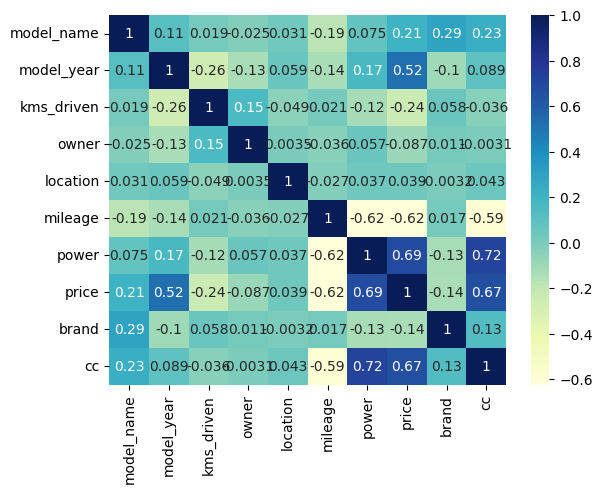

In [1227]:
import seaborn as sns
sns.heatmap(bikes.corr(), annot=True, cmap="YlGnBu");

In [1228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

X=bikes.drop("price", axis=1)
y=bikes["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))
print("Root Mean Squared Error:", root_mean_squared_error(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Mean Squared Error: 0.11706196185695888
R-squared: 0.7963972834451771
Root Mean Squared Error: 0.34214318911379615
Adjusted R-squared: 0.7951901527146149


In [1229]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Mean Squared Error: 0.24093977834398894
R-squared: 0.8990317607187495


In [1230]:
model=RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred) 
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Mean Squared Error: 0.2541144582987191
R-squared: 0.8876879067933708


In [1231]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


RMSE: 0.2442
R2 Score: 0.8963


Wihtout Scaling not getting Optimal Results Now We will try with scaled data

In [1232]:
from sklearn.preprocessing import RobustScaler
scaler_x2 = RobustScaler()
scaler_x2.fit(X_train[numerical_cols_x])
X_train[numerical_cols_x] = scaler_x2.transform(X_train[numerical_cols_x])
X_test[numerical_cols_x] = scaler_x2.transform(X_test[numerical_cols_x])

In [1233]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Mean Squared Error: 0.2411302022905869
R-squared: 0.8988720995074355


In [1234]:
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 0.2442
R2 Score: 0.8963


In [1235]:
X_train

,model_name,model_year,kms_driven,owner,location,mileage,power,brand,cc
4613,5,2009,-0.460413,2,92,1.000000,-0.676347,522,-0.168868
5288,3,2019,-0.202839,1,331,-0.100000,0.270539,2091,0.000000
422,1,2007,1.005584,2,9,0.566087,-0.811617,561,-0.168868
507,49,2014,0.206743,1,757,-0.250000,0.000000,1744,0.831132
5185,7,2014,-0.461299,2,10,-0.100000,0.946886,522,-0.213556
...,...,...,...,...,...,...,...,...,...
5350,7,2018,-0.136836,1,802,-0.400000,0.676347,1744,1.131132
5522,1,2019,-0.060369,1,331,-0.283323,3.787545,1744,1.025989
862,23,2017,2.153156,3,802,-0.100000,0.270539,2091,0.000000
7824,12,2014,1.348238,1,306,-1.750000,-1.460910,789,-0.418868


## Clustering Method

### HDBSCAN Method

In [1236]:
from sklearn.cluster import DBSCAN
import hdbscan

In [1237]:
#cluster= DBSCAN(eps=0.5, min_samples=10)
cluster=hdbscan.HDBSCAN(min_cluster_size=4)

In [1238]:
bikes.head(2)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,331,35.0,19.0,11.058811,2091,220.0
1,69,2016,50000.0,1,331,35.0,19.0,11.652696,1744,350.0


In [1239]:
# Scaling Columns and Data Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler_x2 = StandardScaler()
scaler_y2 = StandardScaler()

In [1240]:
cluster_col = ["model_name", "kms_driven", "location", "mileage", "power","brand", "cc"]
scaler_x2.fit(bikes[cluster_col])
scaler_x2.transform(bikes[cluster_col])
bikes[cluster_col]=scaler_x2.transform(bikes[cluster_col])

In [1241]:
cluster.fit_predict(bikes[cluster_col])

array([274,  -1, 254, ...,  -1,  27, 274], shape=(7636,))

In [1242]:
bikes["DB_Cluster"] = cluster.fit_predict(bikes[cluster_col])

In [1243]:
bikes.head(2)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc,DB_Cluster
0,0.603653,2017,0.015608,1,-0.348592,-0.610108,-0.000481,11.058811,1.173221,-0.116102,274
1,3.282740,2016,1.712065,1,-0.348592,-0.610108,-0.000481,11.652696,0.692328,0.883800,-1


In [1244]:
bikes[bikes["DB_Cluster"]!=-1]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc,DB_Cluster
0,0.603653,2017,0.015608,1,-0.348592,-0.610108,-0.000481,11.058811,1.173221,-0.116102,274
2,-0.553226,2012,-0.097746,1,-0.348592,-0.928831,0.939145,12.611541,-1.652541,0.114644,254
3,0.968983,2017,-0.856885,1,-0.995665,-1.056320,1.565562,11.512935,1.173221,1.268377,44
6,0.238323,2016,0.155334,1,0.499571,1.302234,-0.209286,10.915107,1.173221,-0.423764,84
7,-0.796779,2020,-0.856268,1,-0.348592,-0.291384,0.103922,11.695255,-0.947140,-0.269933,355
...,...,...,...,...,...,...,...,...,...,...,...
7851,0.360099,2015,-0.856525,1,-1.005620,-0.610108,0.521534,11.289794,1.173221,-0.394740,294
7852,-0.370561,2011,-0.498470,1,-0.959827,-0.163895,-0.313689,10.915107,-0.693528,-0.654511,385
7853,-0.796779,2015,-0.854212,1,1.781770,2.258404,-1.180233,10.239996,1.173221,-1.039089,54
7855,2.247638,2016,-0.471532,1,0.499571,0.792276,-0.835704,10.799596,1.173221,-0.654511,27


In [1245]:
bikes1=bikes[bikes["DB_Cluster"]!=-1]

In [1246]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

X=bikes1.drop("price", axis=1)
y=bikes1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Mean Squared Error: 0.1275757635841749
R-squared: 0.755576793123594


In [1247]:
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=500,       # number of trees
    learning_rate=0.05,     # step size shrinkage
    max_depth=6,            # tree depth
    subsample=0.8,          # use 80% of data for each tree
    colsample_bytree=0.8,   # use 80% of features per tree
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: 0.9176872695710058
MSE: 0.0429628167119468
RMSE: 0.20727473727385787


In [1248]:
from sklearn.model_selection import GridSearchCV
param_xg={
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 800, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xg_model=XGBRegressor()
grid_search= GridSearchCV(estimator=xg_model,
                          param_grid=param_xg,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1,
                          verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [4, 6, ...], 'n_estimators': [500, 800, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [1249]:
grid_search.score(X_test,y_test)
print("R2 Score:", r2_score(grid_search.best_estimator_.predict(X_test),y_test))

R2 Score: 0.9132846179854005


In [1250]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=False
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#r2_score(y_test, y_pred)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE: ",root_mean_squared_error(y_test, y_pred))

R2 Score: 0.9218582615026174
RMSE:  0.2019549042000835


In [1251]:
bikes1['price'].mean(), bikes1['price'].median(), bikes1['price'].min(), bikes1['price'].max()


(np.float64(11.212820953955553),
 np.float64(11.289794413577894),
 np.float64(8.674367865788236),
 np.float64(13.122363377404328))

In [1252]:
import numpy as np

# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes1['price'].mean()
median_price = bikes1['price'].median()
min_price = bikes1['price'].min()
max_price = bikes1['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")


R2 Score: 0.9218582615026174
📌 RMSE: 0.20
💰 Mean Price: 11.21
📈 Median Price: 11.29
⬇️ Min Price: 8.67
⬆️ Max Price: 13.12
📊 RMSE as % of mean price: 1.80%
✅ Excellent RMSE (less than 10% of mean price)


In [1253]:
bikes1[bikes1['price']==bikes1['price'].min()].count()

model_name    1
model_year    1
kms_driven    1
owner         1
location      1
mileage       1
power         1
price         1
brand         1
cc            1
DB_Cluster    1
dtype: int64

In [1254]:
bikes1

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc,DB_Cluster
0,0.603653,2017,0.015608,1,-0.348592,-0.610108,-0.000481,11.058811,1.173221,-0.116102,274
2,-0.553226,2012,-0.097746,1,-0.348592,-0.928831,0.939145,12.611541,-1.652541,0.114644,254
3,0.968983,2017,-0.856885,1,-0.995665,-1.056320,1.565562,11.512935,1.173221,1.268377,44
6,0.238323,2016,0.155334,1,0.499571,1.302234,-0.209286,10.915107,1.173221,-0.423764,84
7,-0.796779,2020,-0.856268,1,-0.348592,-0.291384,0.103922,11.695255,-0.947140,-0.269933,355
...,...,...,...,...,...,...,...,...,...,...,...
7851,0.360099,2015,-0.856525,1,-1.005620,-0.610108,0.521534,11.289794,1.173221,-0.394740,294
7852,-0.370561,2011,-0.498470,1,-0.959827,-0.163895,-0.313689,10.915107,-0.693528,-0.654511,385
7853,-0.796779,2015,-0.854212,1,1.781770,2.258404,-1.180233,10.239996,1.173221,-1.039089,54
7855,2.247638,2016,-0.471532,1,0.499571,0.792276,-0.835704,10.799596,1.173221,-0.654511,27


In [1255]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 600),         # number of trees
    'max_depth': [None] + list(range(5, 50)), # depth of each tree
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all cores
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_
print("R2_Score: ", best_rf.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 335}
R2_Score:  0.915010911020881


In [1256]:
root_mean_squared_error(y_test, best_rf.predict(X_test))

0.21061750136738258

In [1257]:
y_pred = best_rf.predict(X_test)

In [1258]:
import numpy as np
y_pred = best_rf.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes1['price'].mean()
median_price = bikes1['price'].median()
min_price = bikes1['price'].min()
max_price = bikes1['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")


R2 Score: 0.915010911020881
📌 RMSE: 0.21
💰 Mean Price: 11.21
📈 Median Price: 11.29
⬇️ Min Price: 8.67
⬆️ Max Price: 13.12
📊 RMSE as % of mean price: 1.88%
✅ Excellent RMSE (less than 10% of mean price)


# RMSE Score is High

In [1259]:
bikes.shape

(7636, 11)

In [1260]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=10, random_state=42, n_init="auto", init="k-means++")
cluster.fit(bikes[cluster_col])
bikes['DB_Cluster'] = cluster.labels_

In [1261]:
bikes

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc,DB_Cluster
0,0.603653,2017,0.015608,1,-0.348592,-0.610108,-0.000481,11.058811,1.173221,-0.116102,0
1,3.282740,2016,1.712065,1,-0.348592,-0.610108,-0.000481,11.652696,0.692328,0.883800,6
2,-0.553226,2012,-0.097746,1,-0.348592,-0.928831,0.939145,12.611541,-1.652541,0.114644,2
3,0.968983,2017,-0.856885,1,-0.995665,-1.056320,1.565562,11.512935,1.173221,1.268377,8
4,-0.431449,2020,-0.755509,1,0.499571,-0.928831,1.147951,12.193499,-1.660857,0.729969,2
...,...,...,...,...,...,...,...,...,...,...,...
7852,-0.370561,2011,-0.498470,1,-0.959827,-0.163895,-0.313689,10.915107,-0.693528,-0.654511,1
7853,-0.796779,2015,-0.854212,1,1.781770,2.258404,-1.180233,10.239996,1.173221,-1.039089,4
7854,0.238323,2016,-0.528955,1,0.499571,1.302234,-0.209286,11.030703,1.173221,-0.423764,4
7855,2.247638,2016,-0.471532,1,0.499571,0.792276,-0.835704,10.799596,1.173221,-0.654511,6


In [1262]:
bikes["DB_Cluster"].value_counts()

DB_Cluster
1    1469
8    1231
3     949
0     900
2     836
6     763
4     683
9     619
7     140
5      46
Name: count, dtype: int64

In [1272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

X=bikes.drop("price", axis=1)
y=bikes["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))

Root Mean Squared Error: 0.4400622694810754
Mean Squared Error: 0.19365480102083465
R-squared: 0.8111590111160505


In [1273]:
import numpy as np
y_pred = best_rf.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes['price'].mean()
median_price = bikes['price'].median()
min_price = bikes['price'].min()
max_price = bikes['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")


R2 Score: -120.18691039576169
📌 RMSE: 11.15
💰 Mean Price: 0.00
📈 Median Price: 0.05
⬇️ Min Price: -3.88
⬆️ Max Price: 2.91
📊 RMSE as % of mean price: 1610262348533437184.00%
❌ High RMSE (more than 30% of mean price) — could be improved


In [1274]:
bikes.head(2)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc,DB_Cluster
0,0.603653,2017,0.015608,1,-0.348592,-0.610108,-0.000481,-0.168126,1.173221,-0.116102,0
1,3.282740,2016,1.712065,1,-0.348592,-0.610108,-0.000481,0.649003,0.692328,0.883800,6


In [1275]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 600),         # number of trees
    'max_depth': [None] + list(range(5, 50)), # depth of each tree
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all cores
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_
print("R2_Score: ", best_rf.score(X_test, y_test))
print("RMSE: ", root_mean_squared_error(y_test, best_rf.predict(X_test)))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best Parameters: {'bootstrap': True, 'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 228}
R2_Score:  0.9084535514436599
RMSE:  0.3063985824203268


In [1281]:
import numpy as np
y_pred = best_rf.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes['price'].mean()
median_price = bikes['price'].median()
min_price = bikes['price'].min()
max_price = bikes['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")


R2 Score: 0.9084535514436599
📌 RMSE: 0.31
💰 Mean Price: 0.00
📈 Median Price: 0.04
⬇️ Min Price: -3.80
⬆️ Max Price: 2.96
📊 RMSE as % of mean price: 4115972653036087296.00%
❌ High RMSE (more than 30% of mean price) — could be improved


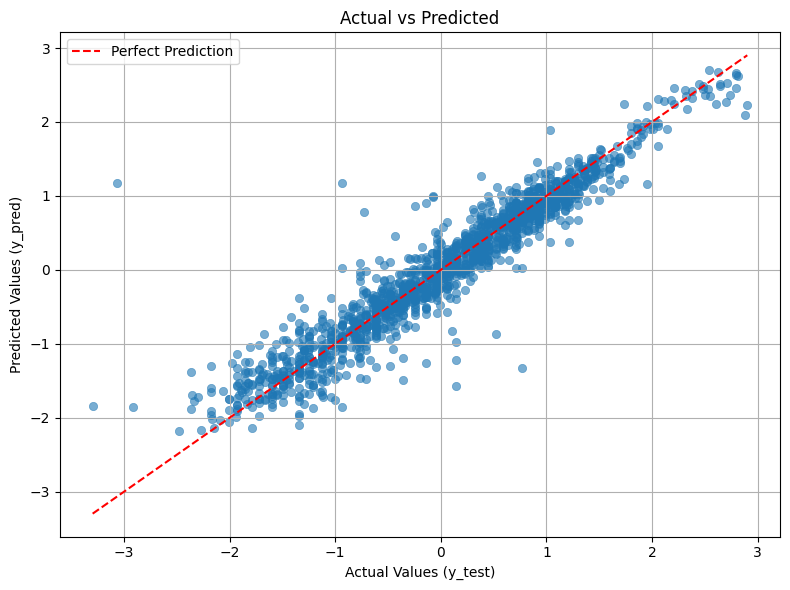

In [1277]:
y_test = y_test.values
y_pred = best_rf.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: >

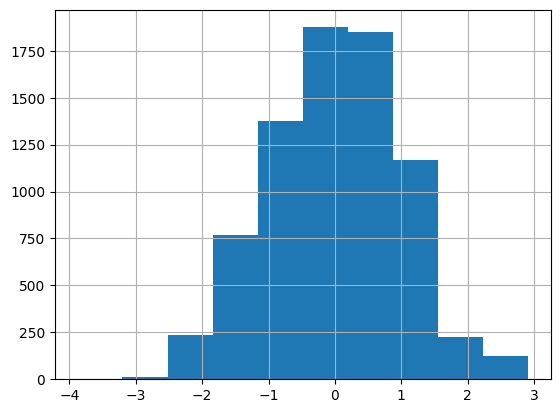

In [1278]:
bikes["price"].hist()

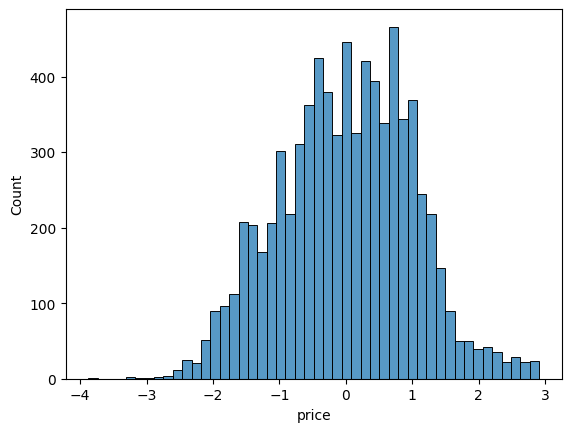

In [1279]:
sns.histplot(bikes["price"]);

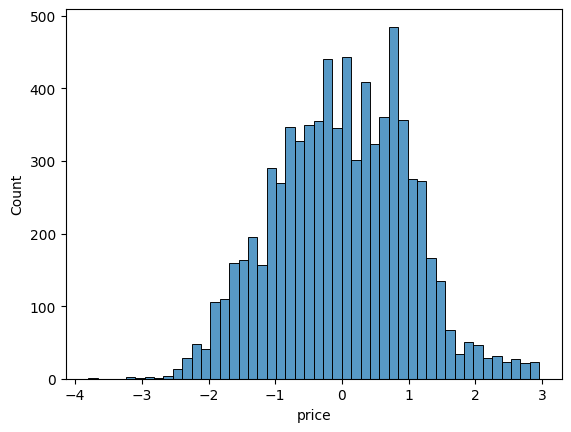

In [1280]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df=bikes
df['price'] = pt.fit_transform(df[['price']])
sns.histplot(df["price"]);